<a href="https://colab.research.google.com/github/jpkrajewski/NLP-youtube-analysis/blob/main/NLP_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

NLP stands for Natural Language Processing. It is a subfield of artificial intelligence and linguistics that focuses on the interaction between computers and human language. NLP involves developing algorithms, models, and techniques that enable computers to understand, interpret, and generate human language in a way that is meaningful and useful.

The primary goal of NLP is to bridge the gap between human language and computer language, allowing machines to process, analyze, and extract information from textual data. NLP encompasses a wide range of tasks and applications

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import joblib

## Importing the dataset

Generic Sentiment | Multidomain Sentiment Dataset
50K sentiments merged from multiple domain (Yelp, Twitter, Mobile reviews)

https://www.kaggle.com/datasets/akgeni/generic-sentiment-multidomain-sentiment-dataset

**Context**

We find sentiment dataset pertaining to a domain. To have a general sense of sentiment we need to understand the sentiment semantics.

**Content**

Combined Mobile reviews, Twitter sentiment, Yelp review, Toxic reviews and few more to cover multiple domain of sentiment analysis.

* 0->Negative
* 1->Neutral
* 2->Positive

In [2]:
dataset = pd.read_csv('./dataset/generic_sentiment_dataset_50k.csv')
features = dataset.iloc[:, 1].values
labels = dataset.iloc[:, 2].values

In [3]:
dataset.head()

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\n2. No lag\n3. This is my fi...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0


## Text Preprocessing

Text data requires significant preprocessing before it can be used for machine learning. Raw text contains:
- Special characters and punctuation
- Inconsistent capitalization
- Single characters or short words (like "a", "the") that don't add meaning
- Morphological variations of the same word (e.g., "run", "running", "runs")

Our preprocessing pipeline will:
1. Remove special characters using regex
2. Remove single characters that don't add meaning
3. Convert to lowercase for consistency
4. Apply lemmatization to group word variations
5. Remove common stopwords that don't contribute to sentiment

This transforms raw, unstructured text data into a cleaner format that emphasizes meaningful content for our models.

In [4]:
# In Natural Language Processing (NLP), text preprocessing plays a crucial role in preparing textual data for analysis.

# The code  aims to clean and normalize the text data,
# reducing noise and simplifying subsequent NLP analysis.

# Preprocessing is crucial for improving the quality and effectiveness of NLP models and algorithms,
# as it helps standardize the text and remove irrelevant information,
# allowing the focus to be on the meaningful aspects of the text that are relevant to the task at hand.

import re
processed_features = []
for sentence in features:

  # Remove all the special characters
  processed_feature = re.sub(r'\W', ' ', str(sentence))

  # remove all single characters
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

  # Remove single characters from the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  # Removing prefixed 'b'
  processed_feature = re.sub(r'^b\s+', '', processed_feature)

  # Converting to Lowercase
  processed_feature = processed_feature.lower()
  processed_features.append(processed_feature)

## Creating the Bag of Words model

Utilizing the NLTK (Natural Language Toolkit) library and the scikit-learn library (specifically the TfidfVectorizer class) to perform feature extraction using the TF-IDF (Term Frequency-Inverse Document Frequency) approach.

The resulting processed_features will contain the numerical feature vectors representing the preprocessed text data, where each feature vector corresponds to a document (in this case, a processed comment). The TF-IDF approach assigns weights to words based on their frequency in a document and their inverse frequency across the entire corpus, allowing the importance of each word to be captured in the feature vectors.

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1500, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Splitting the dataset into the Training set and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [7]:
# List to save accuracies of all the model for future comparison
accuracies = []

## Training the RandomForestClassifer model on the Training set

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=80, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=0)

### Evaluating the model

Accuracy: 0.7185
Negative: Precision=0.6733, Recall=0.7237, F1-Score=0.6976
Neutral: Precision=0.5269, Recall=0.2458, F1-Score=0.3352
Positive: Precision=0.7690, Recall=0.8906, F1-Score=0.8253


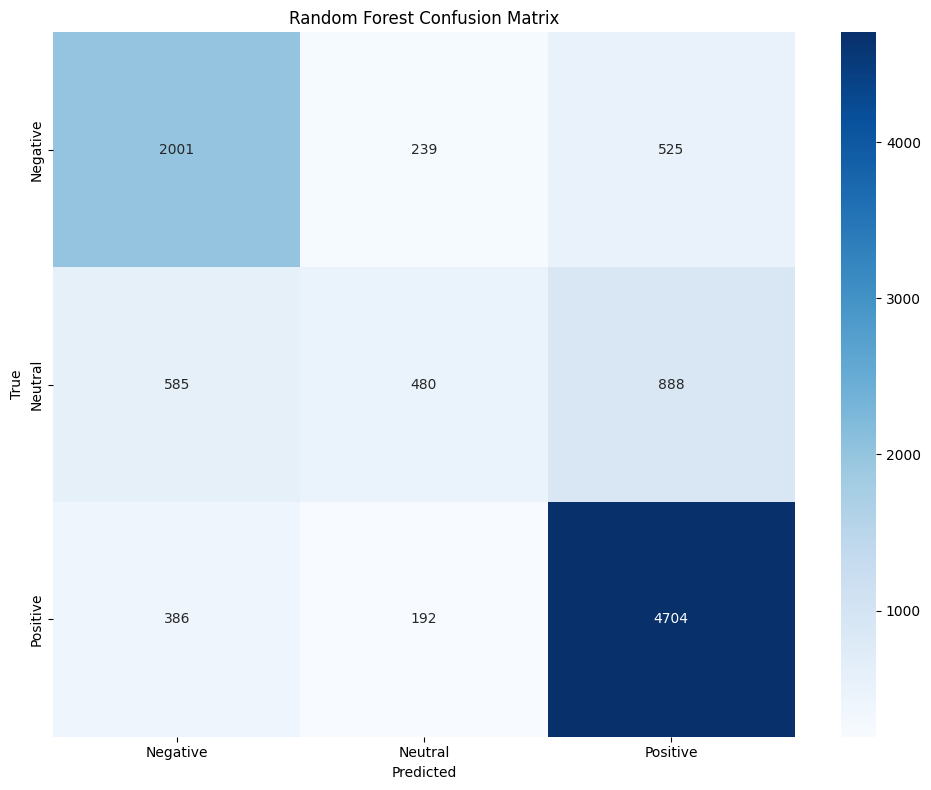

In [9]:
# Predicting the Test set results
rf_predictions = rf_classifier.predict(X_test)

# After getting predictions from a model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate metrics from confusion matrix
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    
    # Add model accuracy to accuracies list
    accuracies.append(accuracy)
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Per-class metrics
    for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")
        
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use after each model
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest')

## Training the Bayes model on the Training set

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

GaussianNB()

### Evaluating the model

Accuracy: 0.6514
Negative: Precision=0.5883, Recall=0.6915, F1-Score=0.6357
Neutral: Precision=0.3522, Recall=0.3098, F1-Score=0.3296
Positive: Precision=0.7943, Recall=0.7567, F1-Score=0.7751


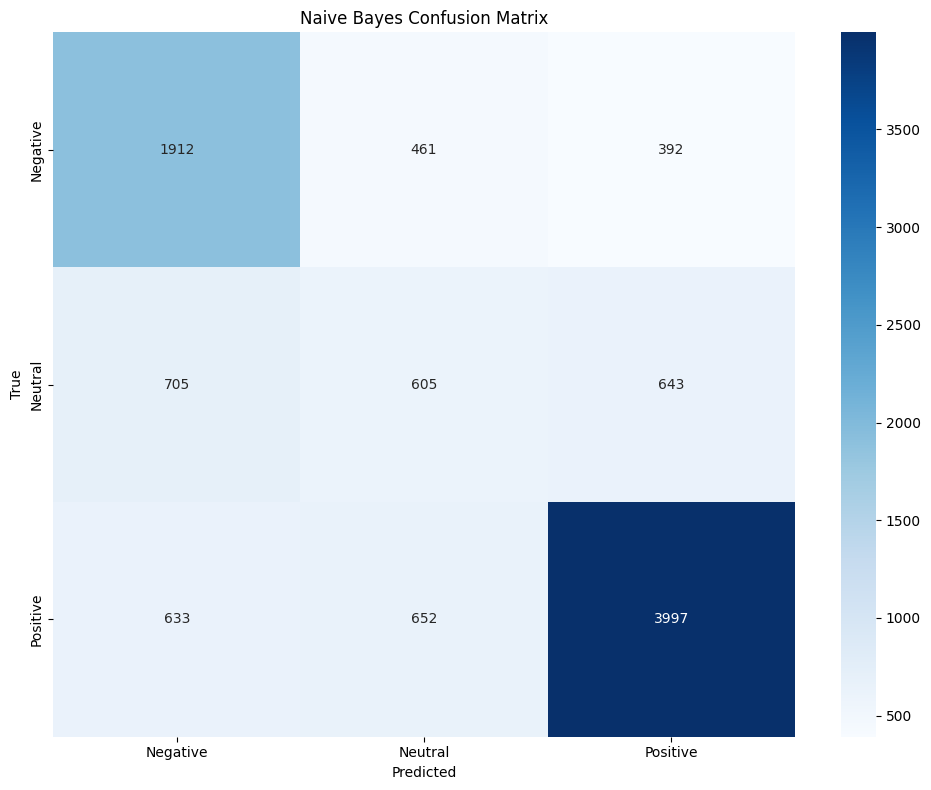

In [11]:
# Predicting the Test set results
gnb_predictions = gnb_classifier.predict(X_test)

# After getting predictions from a model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate metrics from confusion matrix
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    
    # Add model accuracy to accuracies list
    accuracies.append(accuracy)
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Per-class metrics
    for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")
        
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use after each model
plot_confusion_matrix(y_test, gnb_predictions, 'Naive Bayes')

## Training the DecisionTree model

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtree_classifier = DecisionTreeClassifier()
dtree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluating the model

Accuracy: 0.6597
Negative: Precision=0.6132, Recall=0.6250, F1-Score=0.6190
Neutral: Precision=0.3791, Recall=0.2970, F1-Score=0.3330
Positive: Precision=0.7588, Recall=0.8120, F1-Score=0.7845


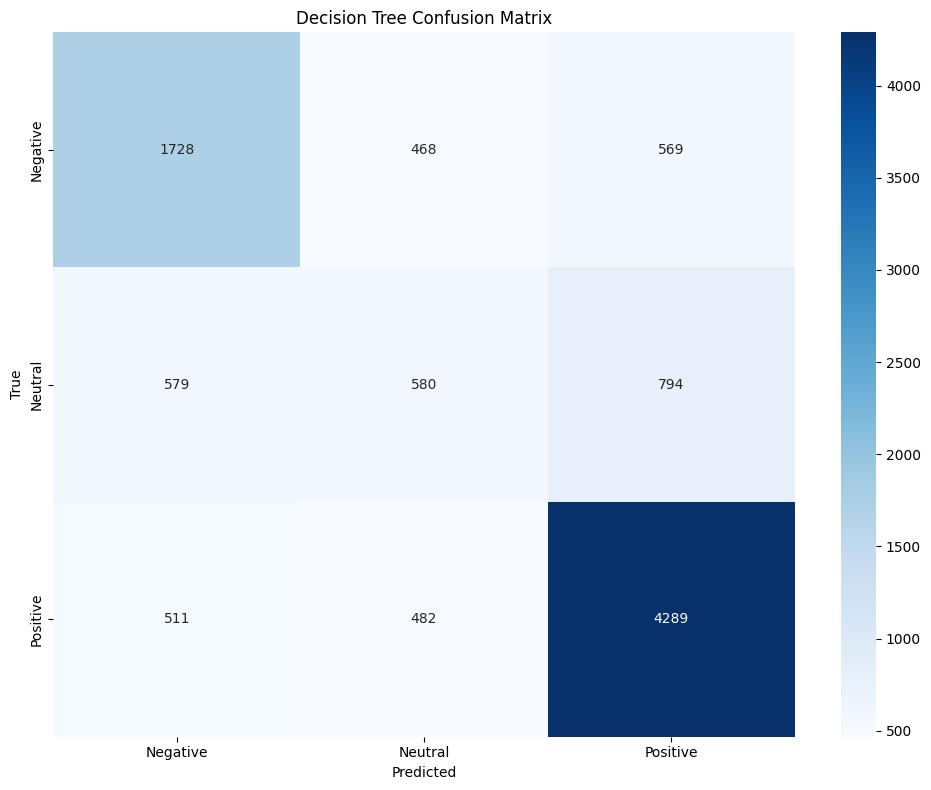

In [13]:
# Predicting the Test set results
dtree_predictions = dtree_classifier.predict(X_test)

# After getting predictions from a model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate metrics from confusion matrix
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    
    # Add model accuracy to accuracies list
    accuracies.append(accuracy)
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Per-class metrics
    for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")
        
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use after each model
plot_confusion_matrix(y_test, dtree_predictions, 'Decision Tree')

## Training the Logistic Regression OVR (One-vs-Rest) model

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with 'ovr' multiclass strategy
lreg_classifier = LogisticRegression(multi_class='ovr')

# Fit the model on the train dataset
lreg_classifier.fit(X_train, y_train)

c:\Users\abdel\anaconda3\envs\gpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

### Evaluating the model

Accuracy: 0.7200
Negative: Precision=0.6756, Recall=0.7396, F1-Score=0.7061
Neutral: Precision=0.4933, Recall=0.2253, F1-Score=0.3093
Positive: Precision=0.7754, Recall=0.8927, F1-Score=0.8299


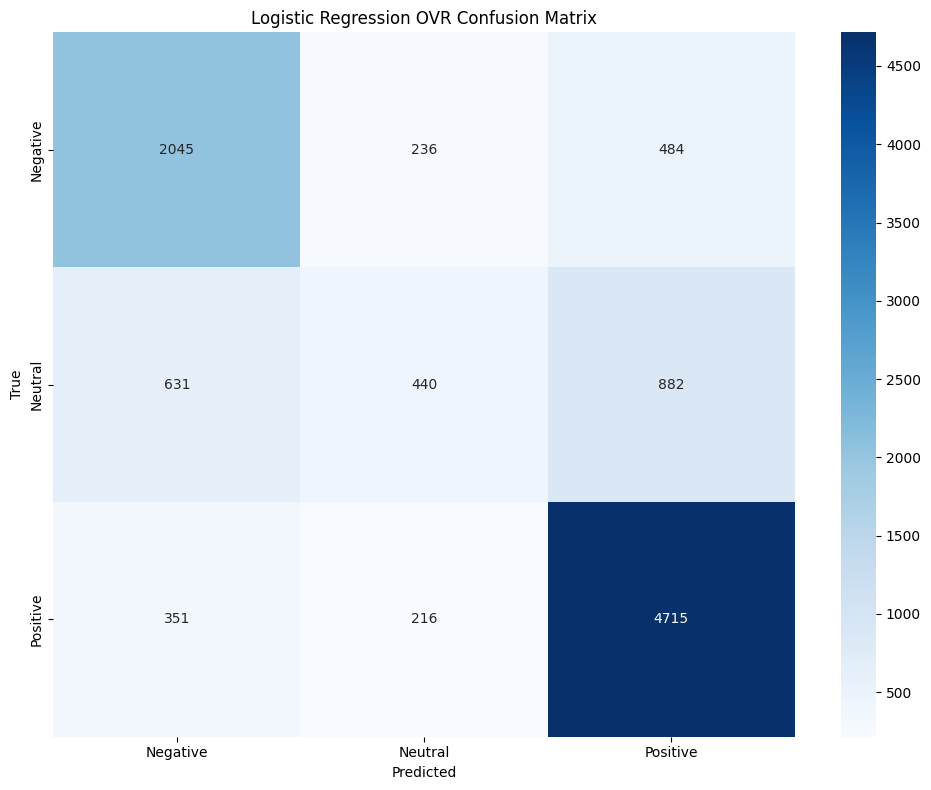

In [15]:
# Predicting the Test set results
lreg_predictions = lreg_classifier.predict(X_test)

# After getting predictions from a model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate metrics from confusion matrix
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    

    # Add model accuracy to accuracies list
    accuracies.append(accuracy)
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Per-class metrics
    for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")
        
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use after each model
plot_confusion_matrix(y_test, lreg_predictions, 'Logistic Regression OVR')


## Training the XGBoost model

In [16]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_classifier = XGBClassifier()

# Train the model using the entire training dataset
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluating the model

Accuracy: 0.7115
Negative: Precision=0.6893, Recall=0.6948, F1-Score=0.6920
Neutral: Precision=0.5058, Recall=0.2238, F1-Score=0.3103
Positive: Precision=0.7493, Recall=0.9006, F1-Score=0.8180


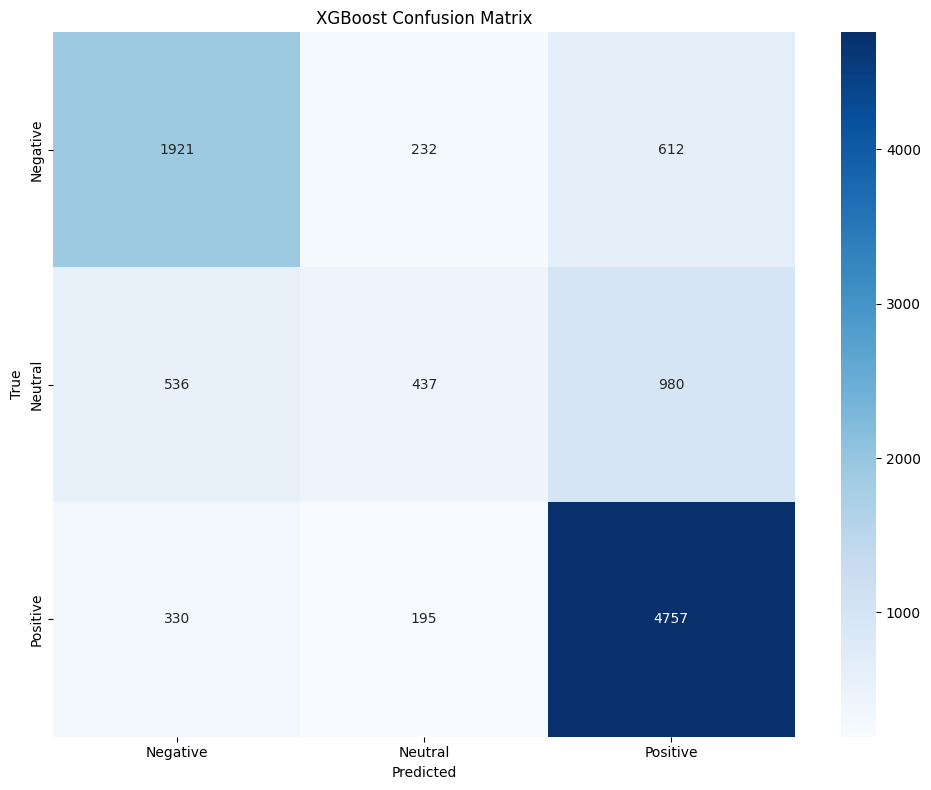

In [17]:
# Predicting the Test set results
xgb_predictions = xgb_classifier.predict(X_test)

# After getting predictions from a model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate metrics from confusion matrix
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    
    # Add model accuracy to accuracies list
    accuracies.append(accuracy)
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Per-class metrics
    for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")
        
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use after each model
plot_confusion_matrix(y_test, xgb_predictions, 'XGBoost')


## Training the LightGBM model

In [18]:
from lightgbm import LGBMClassifier

# Initialize LGBM classifier
lgbm_classifier = LGBMClassifier()

# Train the LGBM classifier using the entire training dataset
lgbm_classifier.fit(X_train, y_train)

c:\Users\abdel\anaconda3\envs\gpu_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\abdel\anaconda3\envs\gpu_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\abdel\anaconda3\envs\gpu_env\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\abdel\anaconda3\envs\gpu_env\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\abdel\anaconda3\envs\gpu_env\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103632
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 1500
[LightGBM] [Info] Start training from score -1.255266
[LightGBM] [Info] Start training from score -1.647399
[LightGBM] [Info] Start training from score -0.649226


LGBMClassifier()

### Evaluating the model

c:\Users\abdel\anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.7197
Negative: Precision=0.6905, Recall=0.7034, F1-Score=0.6969
Neutral: Precision=0.5014, Recall=0.2852, F1-Score=0.3636
Positive: Precision=0.7732, Recall=0.8889, F1-Score=0.8270


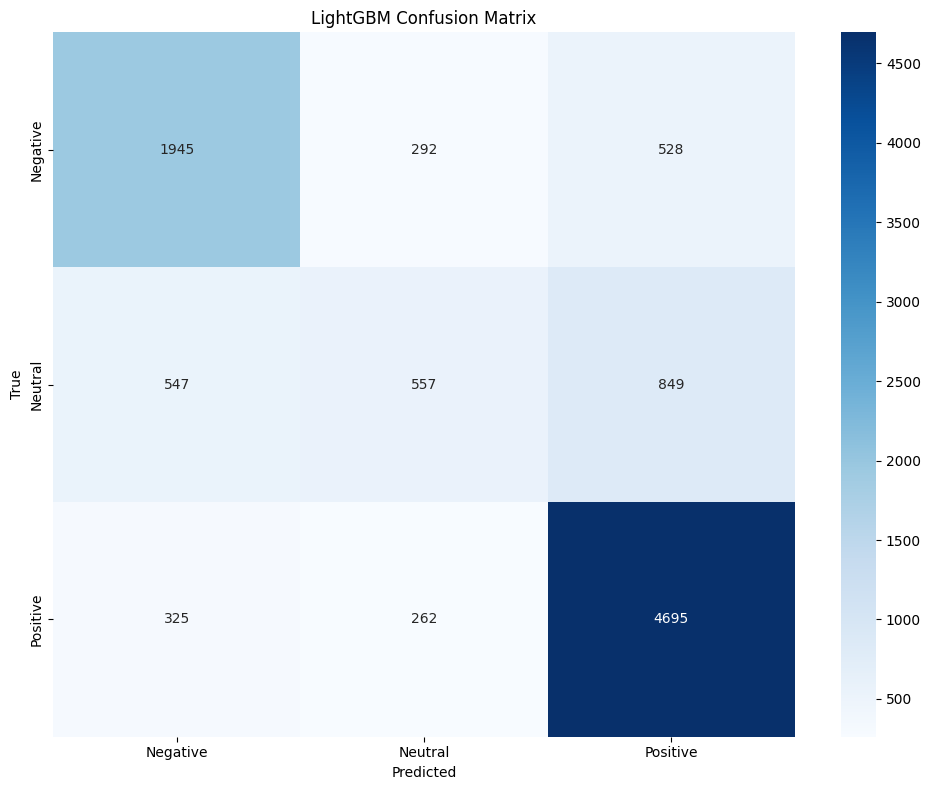

In [19]:
# Make predictions on the testing data and evaluate the model
lgbm_predictions = lgbm_classifier.predict(X_test)

# After getting predictions from a model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate metrics from confusion matrix
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    
    # Add model accuracy to accuracies list
    accuracies.append(accuracy)
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Per-class metrics
    for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")
        
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use after each model
plot_confusion_matrix(y_test, lgbm_predictions, 'LightGBM')

## Training the CatBoost model

In [20]:
from catboost import CatBoostClassifier

# Initialize CatBoost Classifier
catboost_classifier = CatBoostClassifier(verbose=0)

# Train the CatBoost Classifier using the entire training dataset
catboost_classifier.fit(X_train, y_train)

### Evaluating the model

Accuracy: 0.7159
Negative: Precision=0.6808, Recall=0.7197, F1-Score=0.6997
Neutral: Precision=0.5073, Recall=0.2145, F1-Score=0.3015
Positive: Precision=0.7599, Recall=0.8993, F1-Score=0.8237


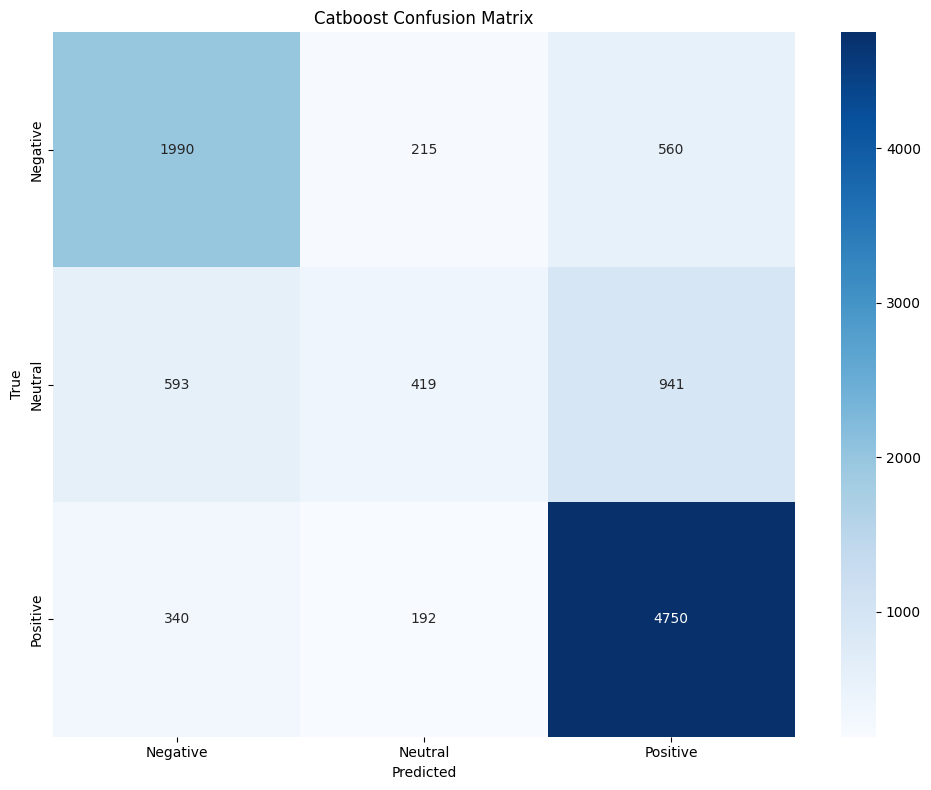

In [21]:
# Make predictions on the testing data and evaluate the model
catboost_predictions = catboost_classifier.predict(X_test)

# After getting predictions from a model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate metrics from confusion matrix
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    
    # Add model accuracy to accuracies list
    accuracies.append(accuracy)
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Per-class metrics
    for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")
        
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use after each model
plot_confusion_matrix(y_test, catboost_predictions, 'Catboost')


## Model Comparison Visualization

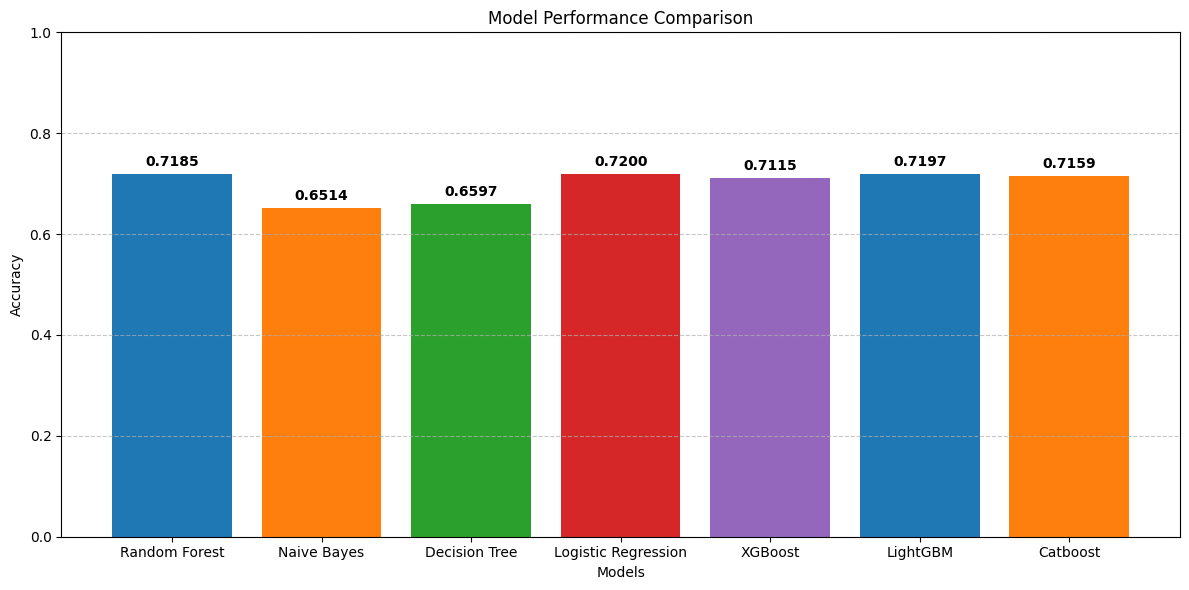

In [22]:
# After evaluating all models
def plot_model_comparison(models, accuracies):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')
    
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.ylim(0, 1.0)  # Set y-axis limit to 0-1 for accuracy
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
models = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'LightGBM', 'Catboost']
plot_model_comparison(models, accuracies)

## Downloading the model

The XGBClassifer has the best accuracy, so I am choosing this model for application.

In [24]:
joblib.dump(xgb_classifier, './app/finalized_model.sav')

['./app/finalized_model.sav']

In [25]:
joblib.dump(vectorizer, './app/vectorizer.sav')

['./app/vectorizer.sav']